In [0]:


from pyspark.sql import SparkSession
from pyspark.sql.functions import count, mean, stddev,avg
spark = SparkSession.builder.appName("AppSummaryStatistics").getOrCreate()
df = spark.read.csv("dbfs:/FileStore/tables/export.csv", header=True, inferSchema=True)
df.show()

+--------------------+------------+---------+--------+-----+------------+----------------+----------------+--------------------+-------+---------------+-----------------+------------+----------+---------+-------+
|            App Name|Size (bytes)|   App id|Currency|Price|Rating (All)|Rating (Current)|Avg Rating (All)|Avy Rating (Current)|Version|Rating(Content)|        Prefrence|Supp Devices|Screenshot|Supp Lang|Vpp Lic|
+--------------------+------------+---------+--------+-----+------------+----------------+----------------+--------------------+-------+---------------+-----------------+------------+----------+---------+-------+
|     PAC-MAN Premium|   100788224|281656475|     USD| 3.99|       21292|              26|             4.0|                 4.5|  6.3.5|             4+|            Games|          38|         5|       10|      1|
|Evernote - stay o...|   158578688|281796108|     USD|  0.0|      161065|              26|             4.0|                 3.5|  8.2.2|            

In [0]:
df.select("Price", "Rating (All)","Supp Devices").describe().show()

+-------+------------------+------------------+------------------+
|summary|             Price|      Rating (All)|      Supp Devices|
+-------+------------------+------------------+------------------+
|  count|              7197|              7197|              7197|
|   mean|1.7262178685562626|12892.907183548701| 37.36181742392664|
| stddev| 5.833005786951921| 75739.40867472602|3.7377152388584527|
|    min|               0.0|                 0|                 9|
|    max|            299.99|           2974676|                47|
+-------+------------------+------------------+------------------+



In [0]:
summary_df = df.groupBy("Prefrence").agg(
    count("Rating (All)").alias("num_Rating (All)"),
    
    stddev("Rating (All)").alias("std_dev_Ratings (All)"),
)


display(summary_df)

Prefrence,num_Rating (All),std_dev_Ratings (All)
Education,453,11545.817943993783
Navigation,46,55178.04735216776
Entertainment,535,28772.537014005036
Sports,114,41030.85149798745
Food & Drink,63,52847.08631771374
Photo & Video,349,118580.71792401557
Travel,81,57637.84398465994
Finance,104,37653.52710222826
Social Networking,167,249317.3812100338
Book,112,27733.547344693976


In [0]:
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt


In [0]:
spark = SparkSession.builder.appName("DataVisualization").getOrCreate()


In [0]:
df = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/tables/export.csv")
pandas_df = df.toPandas()


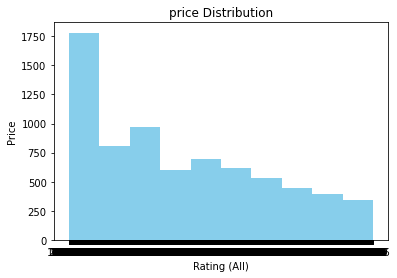

In [0]:
plt.hist(pandas_df['Rating (All)'], bins=10, color='skyblue')
plt.xlabel('Rating (All)')
plt.ylabel('Price')
plt.title('price Distribution')
plt.show()


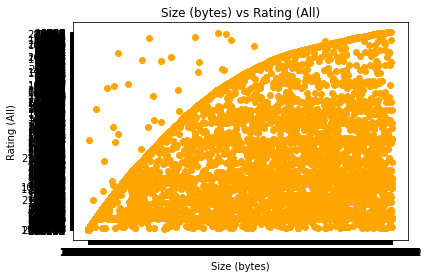

In [0]:
plt.scatter(pandas_df['Size (bytes)'], pandas_df['Rating (All)'], color='orange')
plt.xlabel('Size (bytes)')
plt.ylabel('Rating (All)')
plt.title('Size (bytes) vs Rating (All)')
plt.show()


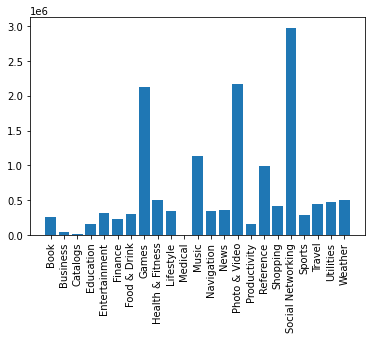

In [0]:
edf=df.toPandas()
edf=edf.groupby('Prefrence')['Rating (All)'].max()
edf=edf.reset_index()
plt.bar(edf['Prefrence'],edf['Rating (All)'])
plt.xticks(rotation=90)
plt.show()
